In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import sympy
from operator import itemgetter
from sympy.physics.quantum.cg import CG
import pandas as pd

In [2]:
j = [ 1.5, 2.5, 3.5, 4.5]
Odd_N_ap = [0.164,0.547,0.870,1.124]#,1.324]
Odd_N_p  = [ -1.148, -1.640, -1.913, -2.087]#, -2.207]

Odd_Z_ap = [ -0.068, -0.084, 0.094, 0.415]#, 0.835]
Odd_Z_p  = [ 1.676, 2.823, 3.793, 4.684]#, 5.531]

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({
    "font.family": "Arial",
    "mathtext.rm": "Arial",
    "axes.linewidth": 1.5,       
    "xtick.major.width": 1.5,   
    "ytick.major.width": 1.5,
    "xtick.minor.width": 1.5,    
    "ytick.minor.width": 1.5,
    "xtick.major.size": 12,     
    "ytick.major.size": 12,
    "xtick.minor.size": 5,      
    "ytick.minor.size": 5
})

In [4]:
om = pd.read_csv("RubenO_db.csv")
om


# col_names = ["Nucleus", "Z", "A", "I", "Omega_sp", "Omega_exp", "Uncertainty"]

# om = pd.read_csv('ARNPS_MagOctu.txt',
#                  delim_whitespace=True,
#                  comment='#',
#                  header=None,
#                  names=col_names)

,N,Z,A,spin,parity,Omega,Omega_err,Omega/r2,Omega/r2 err,Unnamed: 9,Sign from Schwartz
0,14,13,27,2.5,+,0.15900,0.00400,0.020448,0.000514,x,*
1,81,56,137,1.5,+,0.05057,0.00054,0.002202,0.000024,x,NaN
2,126,83,209,4.5,-,0.51000,0.05000,0.016761,0.001643,x,NaN
3,44,35,79,1.5,-,0.11600,0.00000,0.007292,0.000000,x,NaN
4,46,35,81,1.5,-,0.12900,0.00000,0.007975,0.000000,x,NaN
5,18,17,35,1.5,+,-0.01880,0.00000,-0.002034,0.000000,x,NaN
6,20,17,37,1.5,+,-0.01460,0.00000,-0.001522,0.000000,x,NaN
7,78,55,133,3.5,+,0.80000,0.10000,0.035537,0.004442,x,NaN
8,38,31,69,1.5,-,0.10700,0.02000,0.007362,0.001376,x,NaN
9,40,31,71,1.5,-,0.14600,0.02000,0.009855,0.001350,x,NaN


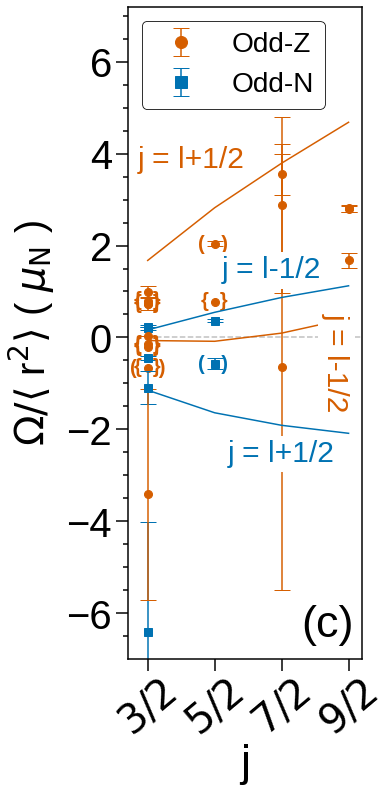

In [15]:
plt.figure(figsize=((4.2,12)))
plt.rcParams["text.usetex"] = False

from matplotlib import rcParams
plt.rcParams["font.family"] = "Liberation Sans"


#plt.yticks(np.arange(int(min(datamll[2]))-1, int(max(datamll[2]))+2, 1), size=20)
plt.xlim(1.2,4.7)
plt.ylim(-7,7.2)

plt.xlabel("Z", size=30)
plt.ylabel(r"$\mu$ [$\mu_N$]", size=30)


#####################################################################################################
# Schwartz lines
#####################################################################################################

plt.xticks([1.5,2.5,3.5,4.5],[r"$3/2$",r"$5/2$",r"$7/2$",r"$9/2$"], fontsize=40, rotation=40)
plt.yticks(fontsize=40)


firstZ = 0
firstN = 0

zcounter = 0
ncounter = 0


for i in range(len(om)):  
    
#     if om.iloc[i]["Omega/r2"] < -2  and om.iloc[i]["Omega/r2"] > 5 :
#         continue


    if om.iloc[i]["Z"]%2==0:
        zcounter += 1

        if firstN == 0:
            plt.errorbar(om.iloc[i]["spin"], om.iloc[i]["Omega/r2"]*100, yerr=om.iloc[i]["Omega/r2 err"]*100, fmt='s', color = "#0072B2", markersize=8, capsize=8, label=r"Odd-N") 
            firstN = 1
            continue
        else:
            if om.iloc[i]["Omega/r2 err"] == 0:
                plt.plot(om.iloc[i]["spin"], om.iloc[i]["Omega/r2"]*100, 's', color = "#0072B2", markersize=8, capsize=8, label=r"Odd-N") 
                plt.text(om.iloc[i]["spin"]-0.21, om.iloc[i]["Omega/r2"]*100-0.1, "{  }", color = "#0072B2", fontsize=20, fontweight='bold')
            else: 
                plt.errorbar(om.iloc[i]["spin"], om.iloc[i]["Omega/r2"]*100, yerr=om.iloc[i]["Omega/r2 err"]*100, fmt='s', color = "#0072B2", markersize=8, capsize=8) 

    if om.iloc[i]["Z"]%2==1: 
        
        ncounter += 1

        if firstZ == 0:
            plt.errorbar(om.iloc[i]["spin"], om.iloc[i]["Omega/r2"]*100, yerr=om.iloc[i]["Omega/r2 err"]*100, fmt='o', color = "#D55E00" ,markersize=8, capsize=8, label=r"Odd-Z") 
            firstZ = 1
            continue
        else:
            if om.iloc[i]["Omega/r2 err"] == 0:
                plt.plot(om.iloc[i]["spin"], om.iloc[i]["Omega/r2"]*100, 'o', color = "#D55E00" ,markersize=8) 
                plt.text(om.iloc[i]["spin"]-0.21, om.iloc[i]["Omega/r2"]*100-0.1, "{  }", color = "#D55E00", fontsize=20, fontweight='bold')
            else:
                plt.errorbar(om.iloc[i]["spin"], om.iloc[i]["Omega/r2"]*100, yerr=om.iloc[i]["Omega/r2 err"]*100, fmt='o', color = "#D55E00" ,markersize=8, capsize=8) 


plt.text(2.5-0.25, -100*0.005686-0.12, "(   )", color = "#0072B2", fontsize=20, fontweight='bold')
plt.text(1.5-0.27, -100*0.006642-0.12, "(    )", color = "#D55E00", fontsize=20, fontweight='bold')
plt.text(2.5-0.25,  100*0.020448-0.12, "(   )", color = "#D55E00", fontsize=20, fontweight='bold')

                
plt.plot(j, Odd_Z_ap ,"-", c="#D55E00", markersize=10, zorder=30)# $j = l+1/2$"
plt.plot(j, Odd_Z_p ,"-", c="#D55E00", markersize=10, zorder=30)# $j = l-1/2$"

plt.plot(j, Odd_N_ap ,"-", c="#0072B2", markersize=10, zorder=30)# $j = l+1/2$"
plt.plot(j, Odd_N_p ,"-", c="#0072B2", markersize=10, zorder=30)# $j = l-1/2$"

plt.xlabel("j", fontsize=45)
plt.ylabel(r"$\Omega/\langle$ r$^2\rangle$ ( $\mu_\mathrm{N}$ )", fontsize=40)
#plt.legend(fontsize=40, edgecolor="black", loc="upper left", markerscale=1.5)

plt.text(1.35, 3.7 , r"j = l+1/2",fontsize=30, color="#D55E00", bbox=dict(facecolor='white', edgecolor='white'))#, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))#, edge="black")
plt.text(4.1, -1.5 , r"j = l-1/2",fontsize=30, color="#D55E00",rotation=-90, bbox=dict(facecolor='white', edgecolor='white'), zorder=3000)#, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))#, edge="black")
plt.text(2.6, 1.3 , r"j = l-1/2",fontsize=30, color="#0072B2", bbox=dict(facecolor='white', edgecolor='white'))#, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))#, edge="black")
plt.text(2.7, -2.7 , r"j = l+1/2",fontsize=30, color="#0072B2", bbox=dict(facecolor='white', edgecolor='white'))#, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))#, edge="black")
plt.text(3.8, -6.5, "(c)", fontsize=45, zorder = 30)

plt.hlines(0, 1.5, 5.5, colors='gray', linestyles='--', alpha=0.5)
plt.gca().yaxis.set_label_coords(-0.3, 0.5)
plt.gca().xaxis.set_label_coords(0.5, -0.13)

plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
#plt.tick_params(axis='y', which='minor', length=2, width=1)


leg = plt.legend(fontsize=28, edgecolor="black", loc="upper left", markerscale=1.5)
frame = leg.get_frame()
frame.set_facecolor("white")   
frame.set_alpha(1.0)           
frame.set_edgecolor("black")   
frame.set_linewidth(0.8)
leg.set_zorder(1000)

plt.savefig("M_O_Exp-cb.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("M_O_Exp-cb.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("M_O_Exp-cb.pdf", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("M_O_Exp-cb.pdf", facecolor='white', bbox_inches='tight')

plt.show()

KeyError: 'Omega_exp/<r**2>'

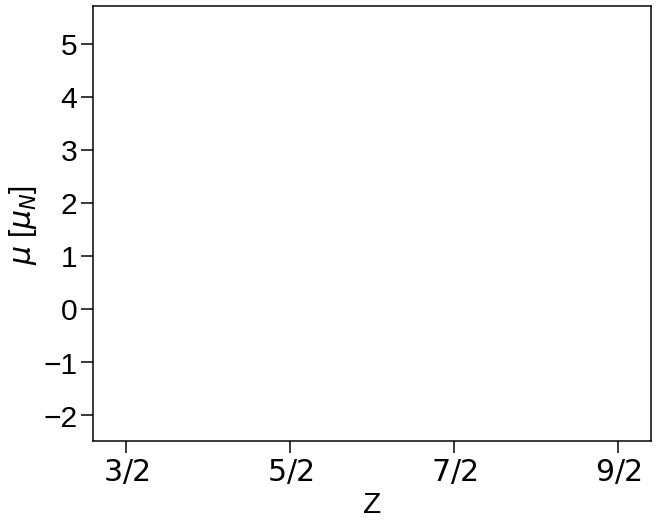

In [6]:
plt.figure(figsize=((10,8)))
plt.rcParams["text.usetex"] = False

from matplotlib import rcParams
plt.rcParams["font.family"] = "Liberation Sans"


#plt.yticks(np.arange(int(min(datamll[2]))-1, int(max(datamll[2]))+2, 1), size=20)
plt.xlim(1.3,4.7)
plt.ylim(-2.5,5.7)

plt.xlabel("Z", size=30)
plt.ylabel(r"$\mu$ [$\mu_N$]", size=30)


#####################################################################################################
# Schwartz lines
#####################################################################################################

plt.xticks([1.5,2.5,3.5,4.5],[r"$3/2$",r"$5/2$",r"$7/2$",r"$9/2$"], fontsize=30)
plt.yticks(fontsize=30)


firstZ = 0
firstN = 0

for i in range(len(om)):  
    
    if om.iloc[i]["Omega_exp/<r**2>"] < -2  and om.iloc[i]["Omega_exp/<r**2>"] > 5 :
        continue

    if om.iloc[i]["Z"]%2==0:
        if firstN == 0:
            plt.errorbar(om.iloc[i]["I"], om.iloc[i]["Omega_exp/<r**2>"], yerr=om.iloc[i]["Uncertainty"], fmt='s', color = "#005AB5", markersize=8, capsize=8, label=r"Odd-N") 
            firstN = 1
            continue
        else:
            plt.errorbar(om.iloc[i]["I"], om.iloc[i]["Omega_exp/<r**2>"], yerr=om.iloc[i]["Uncertainty"], fmt='s', color = "#005AB5", markersize=8, capsize=8) 

    if om.iloc[i]["Z"]%2==1:   
        if firstZ == 0:
            plt.errorbar(om.iloc[i]["I"], om.iloc[i]["Omega_exp/<r**2>"], yerr=om.iloc[i]["Uncertainty"], fmt='o', color = "#DC3220" ,markersize=8, capsize=8, label=r"Odd-Z") 
            firstZ = 1
            continue
        else:
            plt.errorbar(om.iloc[i]["I"], om.iloc[i]["Omega_exp/<r**2>"], yerr=om.iloc[i]["Uncertainty"], fmt='o', color = "#DC3220" ,markersize=8, capsize=8) 
    

plt.plot(j, Odd_Z_ap ,"-", c="#DC3220", markersize=10, zorder=30)# $j = l+1/2$"
plt.plot(j, Odd_Z_p ,"-", c="#DC3220", markersize=10, zorder=30)# $j = l-1/2$"

plt.plot(j, Odd_N_ap ,"-", c="#005AB5", markersize=10, zorder=30)# $j = l+1/2$"
plt.plot(j, Odd_N_p ,"-", c="#005AB5", markersize=10, zorder=30)# $j = l-1/2$"

plt.xlabel("j", fontsize=30)
plt.ylabel(r"$\Omega/\langle$ r$^2\rangle$ [$\mu_\mathrm{N}$]", fontsize=30)
plt.legend(fontsize=25, edgecolor="black", loc="upper left", markerscale=1.5)

plt.text(1.5, 2.8 , r"j = l+1/2",fontsize=25, color="#DC3220")#, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))#, edge="black")
plt.text(3.65, -0.4 , r"j = l-1/2",fontsize=25, color="#DC3220")#, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))#, edge="black")
plt.text(3.65, 1.3 , r"j = l-1/2",fontsize=25, color="#005AB5")#, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))#, edge="black")
plt.text(1.6, -2.1 , r"j = l+1/2",fontsize=25, color="#005AB5")#, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))#, edge="black")
plt.text(4.35, 5, "(c)", fontsize=45, zorder = 30)

plt.hlines(0, 1.5, 5.5, colors='gray', linestyles='--', alpha=0.5)


plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
#plt.tick_params(axis='y', which='minor', length=2, width=1)

plt.legend(fontsize=25, edgecolor="black", loc="upper left", markerscale=1.5)
plt.savefig("M_O_Exp-cb.svg", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("M_O_Exp-cb.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("M_O_Exp-cb.pdf", dpi=300, facecolor='white', bbox_inches='tight')
plt.savefig("M_O_Exp-cb.pdf", facecolor='white', bbox_inches='tight')

plt.show()